In [967]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [968]:
# loading the dataset
df = pd.read_csv('../Dataset/word_develop_ind.csv')
df.head() 

,Country Name,Series Name,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,GDP (current US$),12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,Afghanistan,GNI (current US$),12378340930.5187,15885775064.3022,17781511431.23,19961261595.0253,20209353657.8054,20559672324.9094,19249499438.7455,18350475875.2999,18961769787.4548,18294513957.5523,19080662010.7479,20105156769.1907,14352632363.74,14545219074.5763,..
2,Afghanistan,Imports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,7241822542.17594,5288529076.39681,7904463276.83616,..
3,Afghanistan,Exports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,2079570874.83738,2046123147.09236,2665502824.85876,..
4,Afghanistan,"Inflation, consumer prices (annual %)",-6.81116108898993,2.17853752389414,11.8041858089129,6.44121280934117,7.38577178397855,4.67399603536305,-0.66170916471352,4.38389195513893,4.97595150553892,0.626149149168983,2.30237251516819,..,..,..,..


## Transforming the gdp dataset and renaming columns

In [969]:
df.columns

Index(['Country Name', 'Series Name', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]'],
      dtype='object')

In [970]:
df_melted = df.melt(id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')
df_melted.head(3)

,Country Name,Series Name,Year,Value
0,Afghanistan,GDP (current US$),2009 [YR2009],12416152732.0567
1,Afghanistan,GNI (current US$),2009 [YR2009],12378340930.5187
2,Afghanistan,Imports of goods and services (current US$),2009 [YR2009],..


In [971]:
type(df_melted)

pandas.core.frame.DataFrame

In [972]:
pivot_df =  df_melted.pivot(index=['Country Name', 'Year'], columns= 'Series Name', values='Value').reset_index()
pivot_df.head(3)

Series Name,Country Name,Year,Exports of goods and services (current US$),GDP (current US$),GNI (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total"
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157


In [973]:
type(pivot_df)

pandas.core.frame.DataFrame

In [974]:
pivot_df.rename(columns={ 'Labor force, total': 'Labor_Force',            
                    'Country Name': 'Country_Name',
                   'Exports of goods and services (current US$)' : 'Exports',
                   'Imports of goods and services (current US$)' : 'Imports',
                   'Industry (including construction), value added (annual % growth)' : 'Industry_Rate',
                   'Inflation, consumer prices (annual %)' : 'Inflation_Rate',
                   'GDP (current US$)' : 'GDP', 
                    'Population, total': 'Population',
                    'GNI (current US$)': 'GNI',
                }, inplace=True)


In [975]:
renamed_df = pivot_df
renamed_df.head()

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157
3,Afghanistan,2012 [YR2012],..,19907329777.5872,19961261595.0253,..,6.3940710078319,6.44121280934117,7520865,30466479
4,Afghanistan,2013 [YR2013],..,20146416757.5987,20209353657.8054,..,5.06099068169274,7.38577178397855,7881567,31541209


## Cleaning the gdp dataset

In [976]:
renamed_df['Year'] = renamed_df['Year'].str.split(' ', expand=True)[0]
renamed_df.head(2)

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009,..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010,..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672


In [977]:
# check for duplicates
renamed_df.duplicated().sum()

0

In [978]:
renamed_df.shape

(3255, 10)

In [979]:
renamed_df.isna().sum()

Series Name
Country_Name      0
Year              0
Exports           0
GDP               0
GNI               0
Imports           0
Industry_Rate     0
Inflation_Rate    0
Labor_Force       0
Population        0
dtype: int64

In [980]:
renamed_df.dtypes

Series Name
Country_Name      object
Year              object
Exports           object
GDP               object
GNI               object
Imports           object
Industry_Rate     object
Inflation_Rate    object
Labor_Force       object
Population        object
dtype: object

In [981]:
renamed_df.replace('..', np.nan, inplace=True)
renamed_df.head(2)

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009,NaN,12416152732.0567,12378340930.5187,NaN,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010,NaN,15856668555.8336,15885775064.3022,NaN,6.27060133814976,2.17853752389414,6738587,28189672


In [982]:
renamed_df.isna().sum()

Series Name
Country_Name        0
Year                0
Exports           560
GDP               133
GNI               271
Imports           560
Industry_Rate     469
Inflation_Rate    554
Labor_Force       453
Population          0
dtype: int64

In [983]:
# Drop rows with any NaN values
renamed_df.dropna(inplace=True)

In [984]:
renamed_df.isna().sum()

Series Name
Country_Name      0
Year              0
Exports           0
GDP               0
GNI               0
Imports           0
Industry_Rate     0
Inflation_Rate    0
Labor_Force       0
Population        0
dtype: int64

In [985]:
renamed_df.shape

(2233, 10)

In [986]:
renamed_df.columns

Index(['Country_Name', 'Year', 'Exports', 'GDP', 'GNI', 'Imports',
       'Industry_Rate', 'Inflation_Rate', 'Labor_Force', 'Population'],
      dtype='object', name='Series Name')

In [987]:
cleaned_df = renamed_df[['Country_Name', 'Year', 'Exports', 'Imports', 'GDP', 'Inflation_Rate', 
                         'Industry_Rate', 'Labor_Force', 'Population']]
cleaned_df.head()                      

Series Name,Country_Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population
15,Albania,2009,3040047644.65753,6004538203.11457,12044205549.6571,2.26692209450831,1.86202001364686,1258916,2927519
16,Albania,2010,3337086708.7743,5792187274.96813,11926926615.8015,3.62604695579816,3.39983816194058,1270655,2913021
17,Albania,2011,3769456465.06531,6700234587.48787,12890760315.146,3.42912324722163,2.26437554991978,1388801,2905195
18,Albania,2012,3565050512.4285,5860879346.60531,12319834195.331,2.03159268395301,-6.14066215173217,1328695,2900401
19,Albania,2013,3694413338.18786,5999382677.06795,12776224496.9718,1.93762080205229,2.71720448128706,1227940,2895092


In [988]:
cleaned_df.dtypes

Series Name
Country_Name      object
Year              object
Exports           object
Imports           object
GDP               object
Inflation_Rate    object
Industry_Rate     object
Labor_Force       object
Population        object
dtype: object

In [989]:
cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']] = cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']].astype('float')
cleaned_df[['Year' ,'Labor_Force', 'Population']] = cleaned_df[['Year', 'Labor_Force', 'Population']].astype('int')
cleaned_df.dtypes

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_22152\2673528586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']] = cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']].astype('float')
C:\Users\x-ibah\AppData\Local\Temp\ipykernel_22152\2673528586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['Year' ,'Labor_Force', 'Population']] = cleaned_df[['Year', 'Labor_Force', 'Population']].astype('in

Series Name
Country_Name       object
Year                int32
Exports           float64
Imports           float64
GDP               float64
Inflation_Rate    float64
Industry_Rate     float64
Labor_Force         int32
Population          int32
dtype: object

In [990]:
cleaned_df.describe()

Series Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population
count,2233.000000,2.233000e+03,2.233000e+03,2.233000e+03,2233.000000,2233.000000,2.233000e+03,2.233000e+03
mean,2015.754142,1.355127e+11,1.280421e+11,3.979062e+11,5.922279,2.649504,1.982222e+07,4.367456e+07
std,4.232069,3.105819e+11,2.846527e+11,1.230467e+12,18.391020,11.422225,7.675793e+07,1.590665e+08
min,2009.000000,3.817990e+07,2.015338e+08,3.123777e+08,-16.859691,-77.326017,3.626000e+04,1.049510e+05
25%,2012.000000,4.483693e+09,6.147142e+09,1.370893e+10,1.411939,-0.783988,1.475366e+06,3.371133e+06
50%,2016.000000,1.759096e+10,2.021757e+10,5.049172e+10,3.247588,2.572023,4.393129e+06,9.893082e+06
75%,2019.000000,1.060615e+11,1.033295e+11,2.791167e+11,6.276893,6.148306,1.217643e+07,3.082154e+07
max,2023.000000,3.717888e+12,3.140041e+12,1.788178e+13,557.201817,223.029628,7.818083e+08,1.428628e+09


In [991]:
cleaned_df.Country_Name.describe()

count            2233
unique            161
top       Korea, Rep.
freq               15
Name: Country_Name, dtype: object

## Feature Engineering

In [992]:
# create gdp per capita column
cleaned_df['GDP_Per_Capita'] = round(cleaned_df['GDP'] / cleaned_df['Population'], 2)

# round these variables
cleaned_df['Inflation_Rate'] = round(cleaned_df['Inflation_Rate'])
cleaned_df['Industry_Rate'] = round(cleaned_df['Industry_Rate'])

In [993]:
cleaned_df = cleaned_df.apply(lambda x: round(x))
cleaned_df.head()

Series Name,Country_Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population,GDP_Per_Capita
15,Albania,2009,3.040048e+09,6.004538e+09,1.204421e+10,2.0,2.0,1258916,2927519,4114.0
16,Albania,2010,3.337087e+09,5.792187e+09,1.192693e+10,4.0,3.0,1270655,2913021,4094.0
17,Albania,2011,3.769456e+09,6.700235e+09,1.289076e+10,3.0,2.0,1388801,2905195,4437.0
18,Albania,2012,3.565051e+09,5.860879e+09,1.231983e+10,2.0,-6.0,1328695,2900401,4248.0
19,Albania,2013,3.694413e+09,5.999383e+09,1.277622e+10,2.0,3.0,1227940,2895092,4413.0


In [994]:
cleaned_df = cleaned_df[['Year', 'Exports', 'Imports', 'GDP', 'Inflation_Rate',
       'Industry_Rate', 'Labor_Force', 'Population', 'GDP_Per_Capita']].reset_index(drop=True)

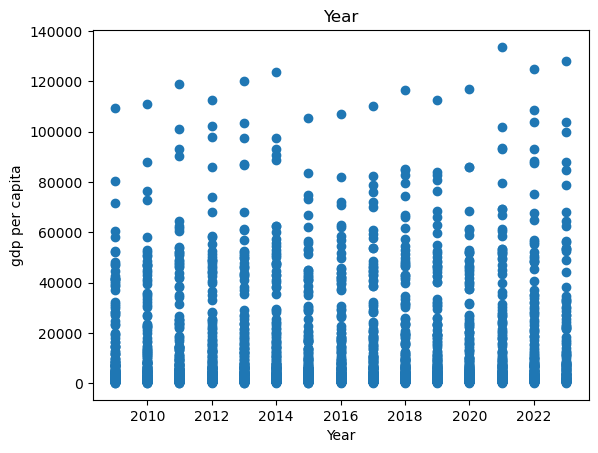

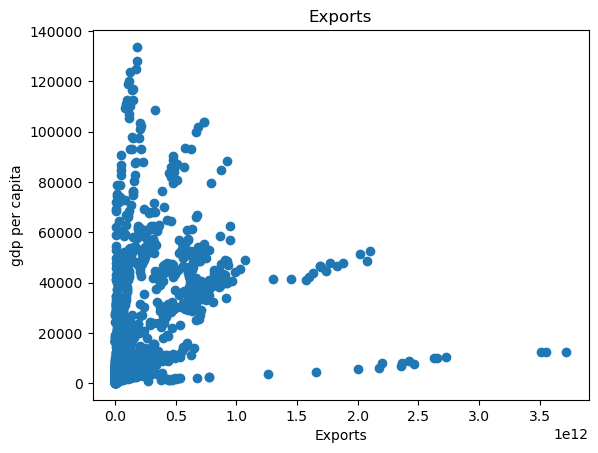

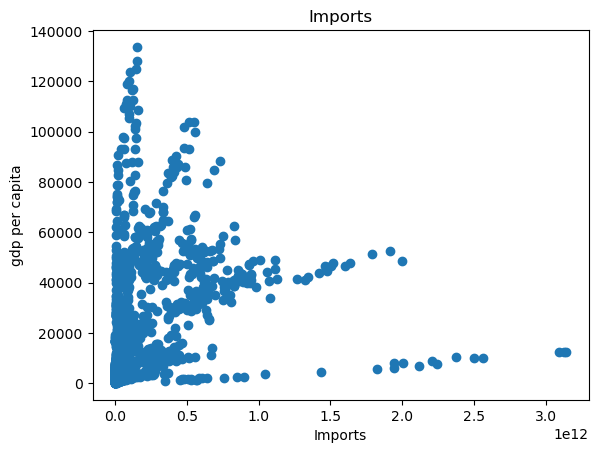

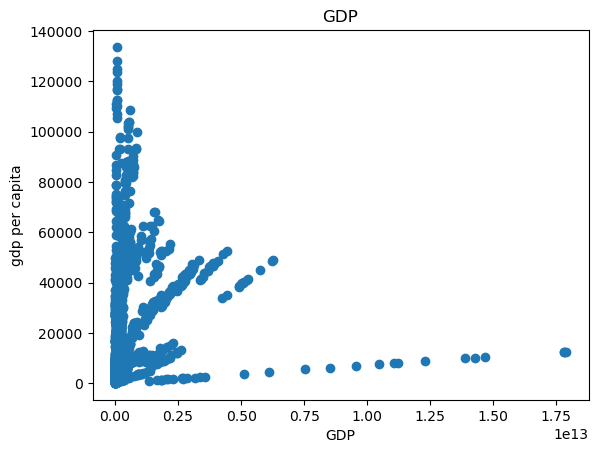

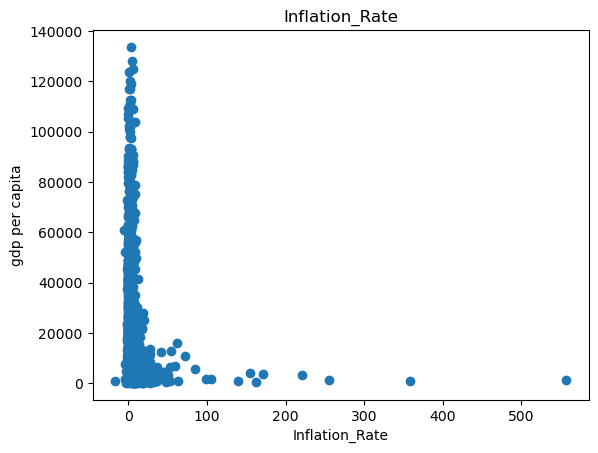

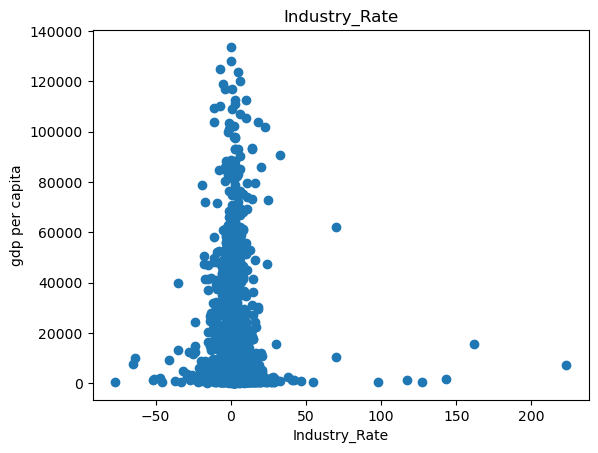

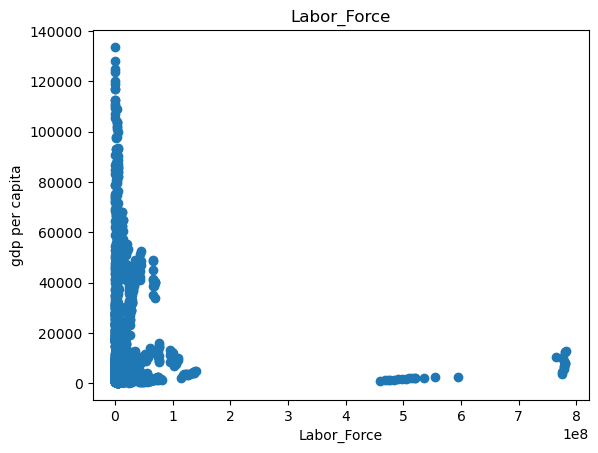

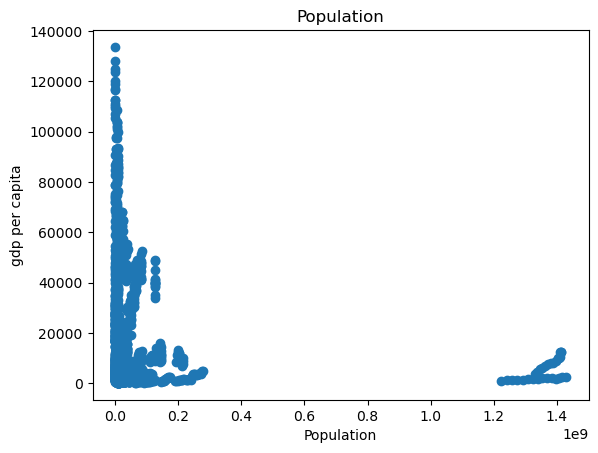

In [995]:
for label in cleaned_df.columns[:-1]:
    plt.scatter(cleaned_df[label], cleaned_df['GDP_Per_Capita'])
    plt.title(label)
    plt.ylabel('gdp per capita')
    plt.xlabel(label)
    plt.show()

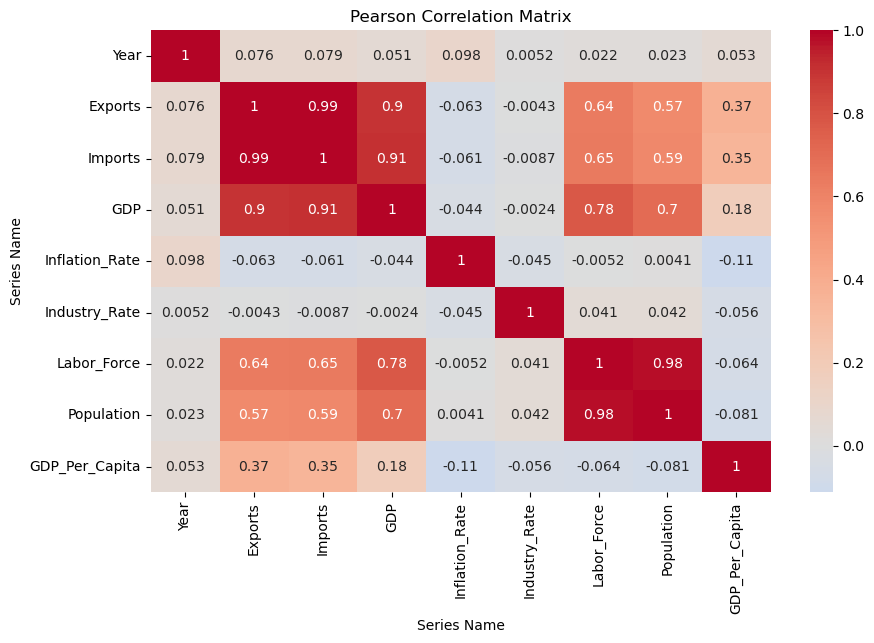

In [996]:
# Pearson correlation
pearson_corr = cleaned_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [997]:
cleaned_df = cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']].reset_index(drop=True)

In [998]:
cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']] = cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']].astype(int)
cleaned_df.tail()

Series Name,Year,Exports,Industry_Rate,Population,GDP_Per_Capita
2228,2018,-2147483648,4,15052184,2269
2229,2019,-2147483648,-9,15354608,1422
2230,2020,-2147483648,-8,15669666,1373
2231,2021,-2147483648,6,15993524,1774
2232,2022,-2147483648,5,16320537,1677


In [999]:
cleaned_df.describe()

Series Name,Year,Exports,Industry_Rate,Population,GDP_Per_Capita
count,2233.000000,2.233000e+03,2233.000000,2.233000e+03,2233.000000
mean,2015.754142,-1.697512e+09,2.652485,4.367456e+07,15384.326467
std,4.232069,1.112861e+09,11.425862,1.590665e+08,21392.197879
min,2009.000000,-2.147484e+09,-77.000000,1.049510e+05,200.000000
25%,2012.000000,-2.147484e+09,-1.000000,3.371133e+06,1974.000000
50%,2016.000000,-2.147484e+09,3.000000,9.893082e+06,5776.000000
75%,2019.000000,-2.147484e+09,6.000000,3.082154e+07,19186.000000
max,2023.000000,2.133433e+09,223.000000,1.428628e+09,133712.000000


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

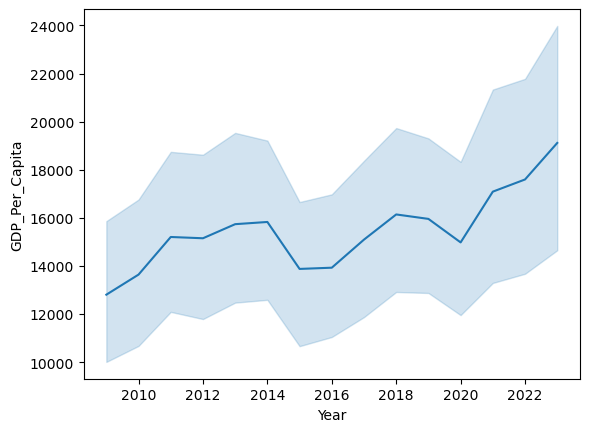

In [1000]:
sns.lineplot(data=cleaned_df, x='Year', y='GDP_Per_Capita')

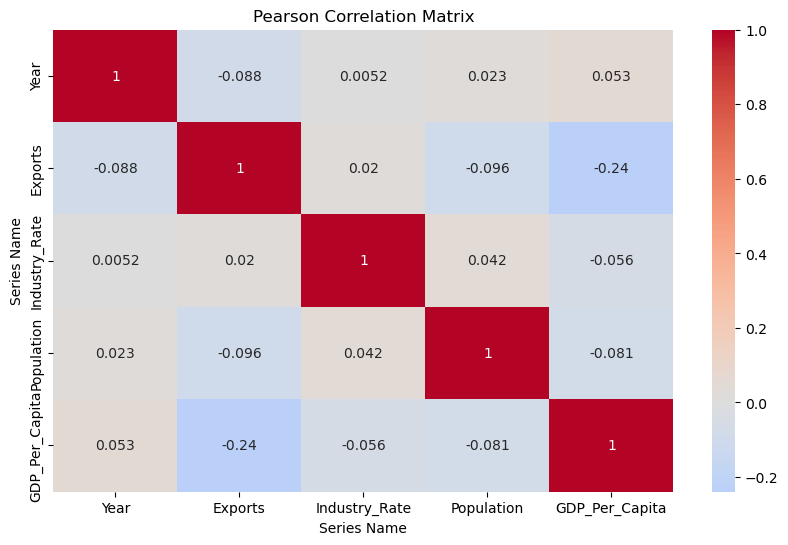

In [1001]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr = cleaned_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [1002]:
# define the target variable
y = cleaned_df['GDP_Per_Capita']

# define the features
X = cleaned_df.drop(['GDP_Per_Capita'], axis=1)

## Machine Learning

In [1003]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import root_mean_squared_error, r2_score

# Scale the features
scaler = PowerTransformer()
X = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


In [1004]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1786, 4), (447, 4), (1786,), (447,))

In [1005]:
# Visual Evaluation
def visual_evaluation(y_test, y_pred):
    residuals = y_test - y_pred  # Residuals
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

## Multi Linear Model

In [1006]:
from sklearn.linear_model import LinearRegression

# Build the model
lr_model = LinearRegression()

# Train the model 
lr_model.fit(X_train, y_train)

## make precdictions
y_pred = lr_model.predict(X_test)

In [1007]:
# Visual Evaluation
# visual_evaluation(y_test, y_pred)

In [1008]:
lr_rmse = round(root_mean_squared_error(y_test, y_pred), 2)
lr_r2 = round(r2_score(y_test, y_pred), 2)

print('rmse: ', lr_rmse)
print('r_square: ', lr_r2)

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=5, scoring='r2')

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Linear Regression Regression Learning Curves')
# plt.legend()
plt.show()

rmse:  20352.83
r_square:  0.12


## Lasso Regression

In [1009]:
from sklearn.linear_model import Lasso

# Build a Lasso regression model
lasso_model = Lasso()

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

In [1010]:
# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# # output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(lasso_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Lasso Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20269.66100032856
root square: 0.12975934631573582


## Ridge Regression 

In [1011]:
from sklearn.linear_model import Ridge

# Train the model 
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_rmse = root_mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

# output result
print(f'root_mean_squared_error: {ridge_rmse}')
print(f'root square: {ridge_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(ridge_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Ridge Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20269.69187182096
root square: 0.1297566954921049


# Elastic Net Regression

In [1012]:
from sklearn.linear_model import ElasticNet

# Build a Elastic Net regression model
en_model = ElasticNet(max_iter=10000, alpha=1.0)

# Train the model
en_model.fit(X_train, y_train)


# # make predictions
y_pred = en_model.predict(X_test)

# Evaluate the model
en_rmse = root_mean_squared_error(y_test, y_pred)
en_r2 = r2_score(y_test, y_pred)

# output result
print(f'root_mean_squared_error: {en_rmse}')
print(f'root square: {en_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(en_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Elastic Net Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20577.04312914878
root square: 0.1031654463671291


In [1013]:
# # Create a DataFrame with the evaluation metrics
# results = pd.DataFrame({
#     'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression', 'Ridge Regression'],
#     'RMSE': [linear_rmse, lasso_rmse, elastic_net_rmse, ridge_rmse],
#     'R2': [linear_r2, lasso_r2, elastic_net_r2, ridge_r2]
# })
# results
